In [66]:
%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')


/Users/markdessain/Envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [210]:

from redis_helper import MyRedis

db = MyRedis()

In [211]:
def aaa():
    for timestamp, score in db.zrangebyscore('index:score:created_at_hour', '-inf', '+inf', withscores=True):
        yield int(timestamp), int(score)

In [212]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=aaa(), columns=['datetime', 'num_of_tweets'])


In [213]:
df['datetime'] = pd.to_datetime(df['datetime'],unit='s')
# df['datetime'] = df.datetime.astype(np.int64)

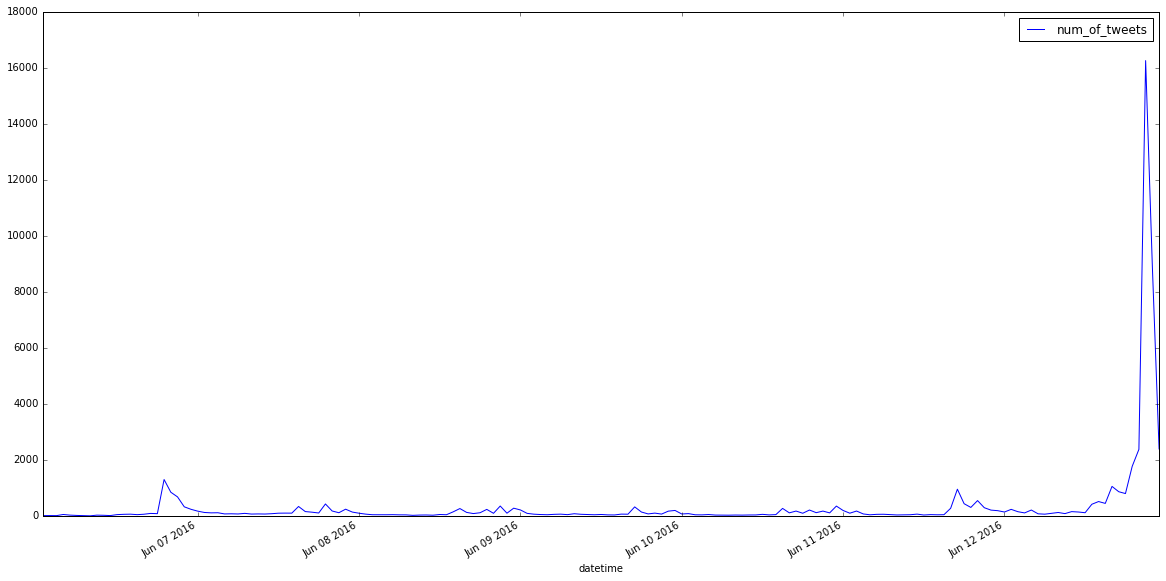

In [214]:
import datetime
df2 = df[(df.datetime > datetime.datetime(2016, 6, 6)) & (df.datetime < datetime.datetime(2016, 6, 13))]
# df2 = df[(df.num_of_tweets < 3000)]

df2.plot(x='datetime', y='num_of_tweets', figsize=(20,10))

In [215]:
from IPython.display import Image, display

import matplotlib.pyplot as plt

images = [
    display(Image(url=url.decode()), width=1000, height=1000)
    for url in db.zrange('index:score:media', 0, 20, desc=True)
]

# help(Image)


In [216]:
[
    screen_name.decode()
    for screen_name in db.zrange('index:score:user_mentions', 0, 10, desc=True)
]


['battlefield',
 'ign',
 'bfbulletin',
 'xbox',
 'snoopdogg',
 'nvidia',
 'ea_dice',
 'eaaccess',
 'ea',
 'doom49',
 'nvidiageforce']

In [217]:
[
    screen_name.decode()
    for screen_name in db.zrange('index:score:hashtags', 0, 10, desc=True)
]


['battlefield',
 'battlefield1',
 'bf1',
 'e32016',
 'e3',
 'eaplay',
 'gameready',
 'xboxe3',
 'xboxone',
 'bfsquadspromo',
 'xbox']

In [218]:
import json
ids = set()

for tweet_id in db.zrange('index:tweet:hashtags:battlefield1', 0, 50, desc=True):
    tweet = json.loads(db.get('tweet:%s' % tweet_id.decode()).decode())
    
    if tweet['original_id_str']:
        if tweet['original_id_str'] not in ids:
            tweet = json.loads(db.get('tweet:%s' % tweet['original_id_str']).decode())
            ids.add(tweet['id_str'])
        else:
            tweet = None
        
    if tweet:
        print(json.loads(db.get('tweet:%s' % tweet_id.decode()).decode())['text'])
# print(ids)

RT @thetafferboy: EA hiring for #Battlefield1 team https://t.co/zJcm0ofpGI
I'm a grown man, coming up on 45 this Sept. 1st, and I can not wait to play @Battlefield 1!  BRING IT!!! #battlefield1
Watch how #battlefield fans reacted to #battlefield1 trailer😀😀😀
https://t.co/vGvhPZ58dY
https://t.co/4hmSWo2w4X
RT @Nat0_o: It's a wrap!!! #E3 #E32016 #Battlefield1 #BF1 https://t.co/nW2HDQ5AfW
RT @The_Jitsu: #E3 Watching E3 coverage and looking forward to #GOW4 and #Battlefield1 on @Xbox
RT @Mr_video_Gamer Battlefield 1 gameplay looks awesome! #Battlefield1 #gaming #E3 #WW1 #EA https://t.co/MD9YEPW3ML
"...most of Battlefield 1 at this early stage feels like Bad Company 2." #MusicToMyEars

#Battlefield1

https://t.co/TPaF02fFDj
RT @xQueenSerenityx: Check your @Snapchat stories! Look for me under @IGN and #battlefield1 reactions 🙈🎮 The game is amazing 👍🏼 https://t.c…
RT @werejul: It's a wrap for me at #E3. Astonishing reaction from all who played #Battlefield1. And now: sleep. https://t.co/wcjQDJ